Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(33600, 784)
(8400, 784)
(33600,)
(8400,)


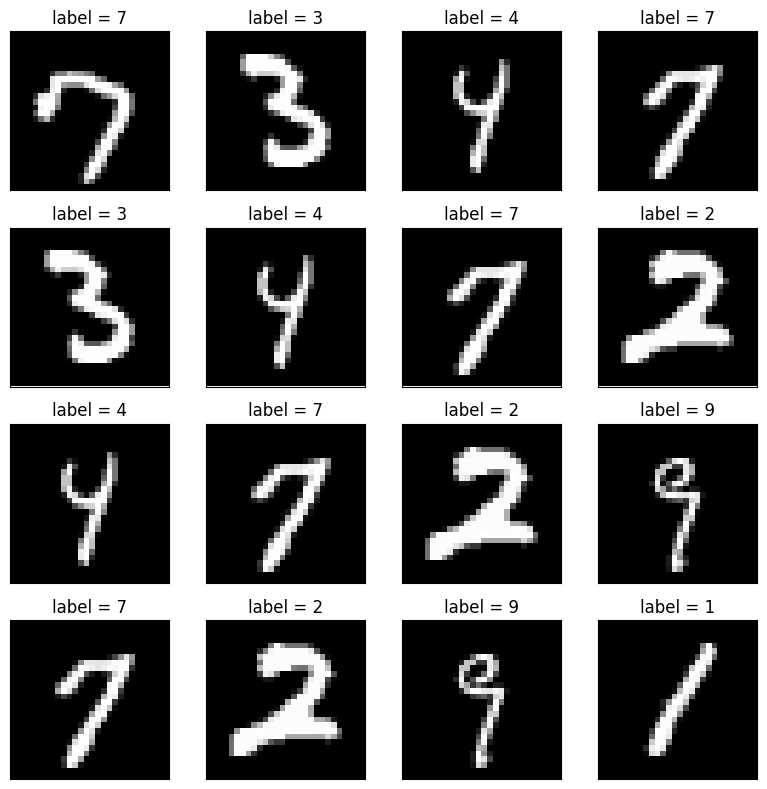

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

#데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/drive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/drive/test.csv')

#Label 분리
x = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

#학습데이터, 검증데이터 8:2로 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

#1.이미지 샘플 시각화
fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_train[i*4 + j*4].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label = %s' % (y_train[i*4 + j*4]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
#2.Scikit-learn 을 이용해서 모델을 학습
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                         intercept_scaling=1, l1_ratio=None, max_iter=100,
                         multi_class='multinomial', n_jobs=None, penalty='l2',
                         random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                         warm_start=False)

clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=0.001)

In [ ]:
#3.검증(Validation)데이터(x_val)를 prediction 하고 정확도를 평가
from sklearn.metrics import accuracy_score
y_val_pred = clf.predict(x_val)

print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))

Model accuracy is 0.916


Correctly predicted images:


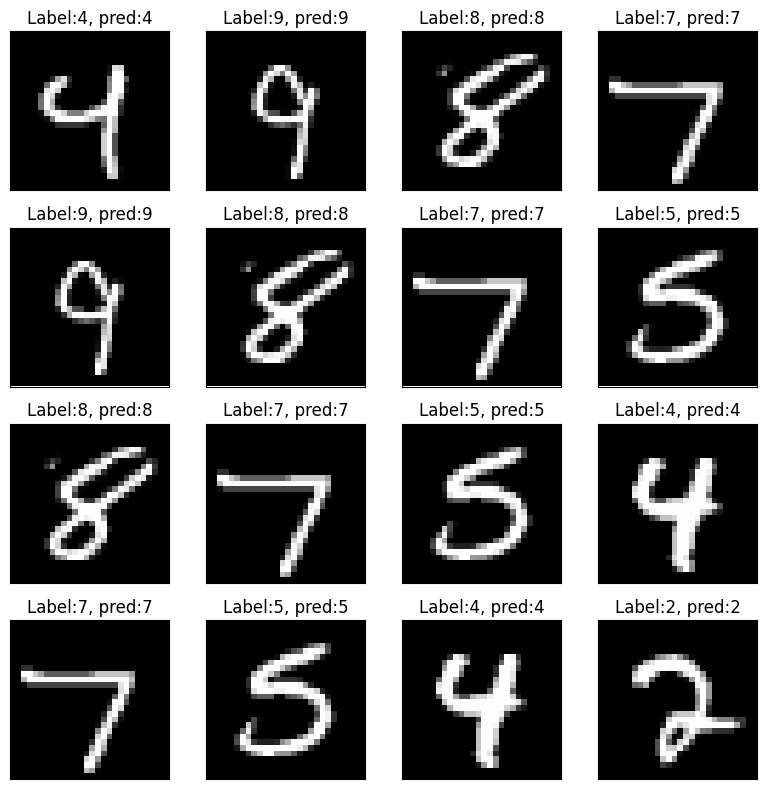

In [ ]:
#4.옳게 분류한 이미지를 아래 format 에 맞게 시각화
print("Correctly predicted images:")
x_val_correct = x_val[y_val==y_val_pred,:]
y_val_correct = y_val[y_val==y_val_pred]
y_val_pred_correct = y_val_pred[y_val==y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_val_correct[i*4 + j*4].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label:%d, pred:%d' % (y_val_correct[i*4 + j*4], y_val_pred_correct[i*4 + j*4]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.tight_layout()
plt.show()

Incorrectly predicted images:


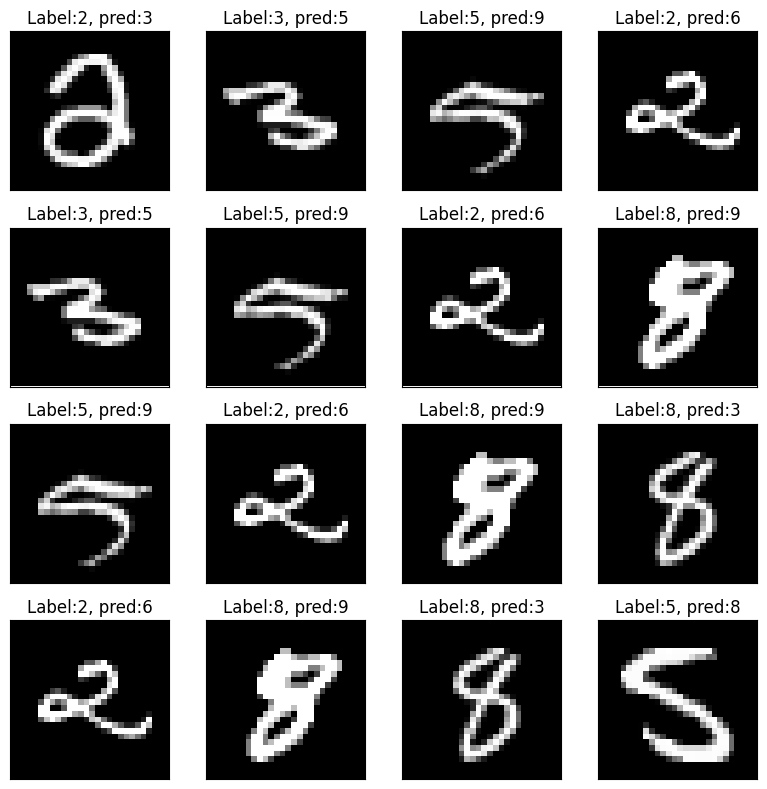

In [ ]:
#5.잘못 분류한 이미지를 아래 format에 맞게 시각화
print("Incorrectly predicted images:")
x_val_incorrect = x_val[y_val != y_val_pred, :]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(x_val_incorrect[i*4 + j*4].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label:%d, pred:%d' % (y_val_incorrect[i*4 + j*4], y_val_pred_incorrect[i*4 + j*4]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
#6.테스트 데이터(x_test)를 사용해서 예측하기

test_data = pd.read_csv('/content/drive/MyDrive/drive/test.csv')
x_test = test_data.values

preds = clf.predict(x_test)

In [ ]:
#7.예측값을 파일(sample_submission.csv)로 내보내기
sample_submission = pd.DataFrame({'ImageId': np.arange(1, len(preds) + 1)})
sample_submission['Label'] = preds

sample_submission.to_csv('/content/drive/MyDrive/drive/sample_submission.csv', index=False)